<a href="https://colab.research.google.com/github/s-chundi/what-bird-is-this/blob/main/Birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wd = '/content/drive/MyDrive/Colab Notebooks/Birds/'
with zipfile.ZipFile(wd+'archive.zip', 'r') as z:
  z.extractall()

In [ ]:
species = sorted(os.listdir('./train'))
print(species)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BORNEAN BRISTLEHEAD', 'BORNEAN LEAFBIRD', 'BORNEAN PHEA

In [ ]:
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, horizontal_flip=True
                           ).flow_from_directory(directory='train', target_size=(224,224))
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, horizontal_flip=False
                           ).flow_from_directory(directory='test', target_size=(224,224), shuffle=False, batch_size=1)
valid = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, horizontal_flip=True
                           ).flow_from_directory(directory='valid', target_size=(224,224))

Found 43622 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output
newout = tf.keras.layers.Dense(units=300, activation='softmax')(x)
birdmodel = tf.keras.Model(inputs=mobile.input, outputs=newout)

In [ ]:
# Edit i for better models. i = 10-15 is ideal, but I'm impatient
for layer in birdmodel.layers[:-4]:
  layer.trainable = False
birdmodel.compile(optimizer=Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])
birdmodel.fit(x=train, validation_data=valid, epochs=5, verbose=2)

False
Epoch 1/2
1364/1364 - 126s - loss: 1.3871 - accuracy: 0.7119 - val_loss: 0.3332 - val_accuracy: 0.9160
Epoch 2/2
1364/1364 - 122s - loss: 0.3614 - accuracy: 0.9112 - val_loss: 0.2193 - val_accuracy: 0.9360


array([[9.99103069e-01, 3.02962029e-08, 1.12867129e-08, ...,
        2.53370835e-09, 1.84791304e-07, 1.00462999e-10],
       [9.94705737e-01, 1.73834955e-08, 7.18567392e-08, ...,
        8.95383945e-09, 1.03490684e-07, 1.03738795e-09],
       [9.99894738e-01, 4.43858318e-11, 1.10181519e-09, ...,
        3.46094160e-11, 1.68445945e-06, 3.34720411e-08],
       ...,
       [3.53306229e-09, 4.81794359e-06, 9.80933224e-10, ...,
        2.71620904e-03, 1.50801439e-04, 9.46413279e-01],
       [2.12956652e-09, 1.56954120e-04, 2.37679654e-08, ...,
        3.83374281e-05, 1.07722627e-07, 1.09066265e-02],
       [1.73705189e-07, 2.45423666e-06, 7.68861308e-10, ...,
        3.52539719e-05, 5.09064121e-05, 9.83668864e-01]], dtype=float32)

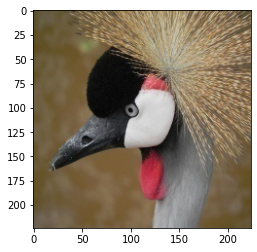

In [ ]:
results = np.round(birdmodel.predict(test, verbose=1))

test accuracy =  0.9273333333333333
AFRICAN CROWNED CRANE


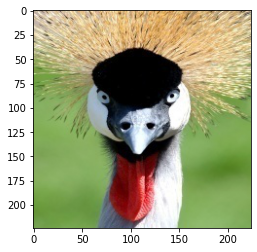

In [ ]:
final_result = np.array([np.argmax(results[i]) for i in range(1500)])

print('test accuracy = ', np.mean(result == test.labels))

test_img = np.array(test.next()[0][0])
plt.imshow(test_img*.5+.5)
test_result = birdmodel.predict(x= np.expand_dims(test_img, 0))
print(species[np.argmax(test_result)])

In [66]:
birdmodel.save('birdmodel.h5')